In [67]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import matplotlib.animation as anim
import matplotlib as mpl
from mpl_toolkits.mplot3d import axes3d
from tqdm import tqdm 
import sympy as sym


### 0.1 Ecuación diferencial no lineal

In [39]:
def f(t,u,q):
    return u**q

In [40]:
N = 5000
t = np.linspace(0.,10.,N)

In [41]:
def GetRK4(f,r0,t, init = False, Npoints = 4,q=1):
    
    h = (t[-1] - t[0])/(len(t)-1)
    
    y = np.zeros(len(t))
    y[0] = r0[0]
    
    if init == False:
        Npoints = len(t)
        
    for i in range(1,Npoints):
        
        k1 = f(t[i-1],y[i-1],q)
        k2 = f(t[i-1] + 0.5*h, y[i-1] + 0.5*k1*h,q)
        k3 = f(t[i-1] + 0.5*h, y[i-1] + 0.5*k2*h,q)
        k4 = f(t[i-1] + h, y[i-1] + k3*h,q)
        
        y[i] = y[i-1] + h*(k1 + 2*k2 + 2*k3 + k4)/6
    
    
    return y

<IPython.core.display.Javascript object>


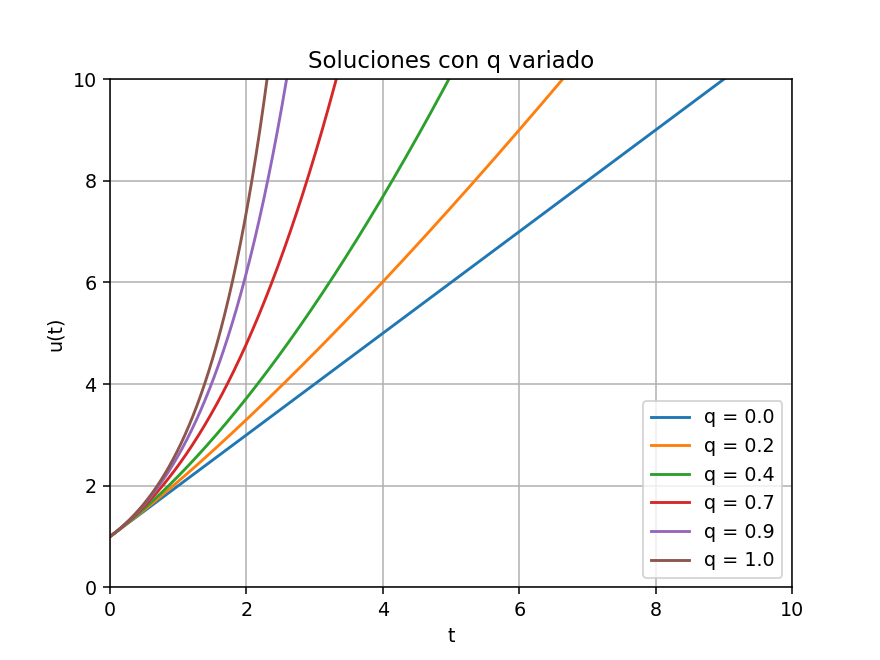

Text(0, 0.5, 'u(t)')

In [43]:
r0 = [1]

Q = [0., 0.2, 0.4, 0.7, 0.9, 1.]

for i in Q:
    
    yrk4 = GetRK4(f,r0,t,False,4,i)
    plt.plot(t,yrk4, label = f'q = {i}')
    plt.legend()

    
plt.xlim(0,10)
plt.ylim(0,10)
plt.grid()
plt.title("Soluciones con q variado")
plt.xlabel("t")
plt.ylabel("u(t)")
    


### 0.2 Metodos multipaso
##### Metodo Adams-Bashforth 3 puntos
Para calcular los coeficientes utilizamos la siguiente ecuacion
$$ b_{2-j}= \frac{(-1)^j}{j!(2-j)!}\int^1_0 \prod^2_{i=0, i\not = j}(u+i) du $$

In [45]:
t = sym.Symbol('t',Real=True)

In [46]:
prod1 = t*(t+1)
F1 = sym.integrate(prod1,(t,0,1))*1/2
prod2 = t*(t+2)
F2 = sym.integrate(prod2,(t,0,1))*-1
prod3 = (t+1)*(t+2)
F3 = sym.integrate(prod3,(t,0,1))*1/2

In [47]:

print(f'Coef1: {F1}',f'Coef2: {F2} ',f'Coef3: {F3}')

Coef1: 5/12 Coef2: -4/3  Coef3: 23/12


##### Metodo Adams-Bashforth 4 puntos
Para calcular los coeficientes utilizamos la siguiente ecuacion
$$ b_{3-j}= \frac{(-1)^j}{j!(3-j)!}\int^1_0 \prod^3_{i=0, i\not = j}(u+i) du $$

In [48]:
prod1 = t*(t+1)*(t+2)
F1 = sym.integrate(prod1,(t,0,1))*-1/6
prod2 = t*(t+1)*(t+3)
F2 = sym.integrate(prod2,(t,0,1))*1/2
prod3 = t*(t+2)*(t+3)
F3 = sym.integrate(prod3,(t,0,1))*-1/2
prod4 = (t+1)*(t+2)*(t+3)
F4 = sym.integrate(prod4,(t,0,1))*1/6

In [49]:
print(f'Coef1: {F1}',f'Coef2: {F2} ',f'Coef3: {F3}',f'Coef4: {F4}')

Coef1: -3/8 Coef2: 37/24  Coef3: -59/24 Coef4: 55/24


##### Metodo Adams-Multon 3 puntos
Para calcular los coeficientes utilizamos la siguiente ecuacion
$$ b_{2-j}= \frac{(-1)^j}{j!(2-j)!}\int^1_0 \prod^2_{i=0, i\not = j}(u+i-1) du $$

In [50]:
prod1 = (t-1)*t
F1 = sym.integrate(prod1,(t,0,1))*1/2
prod2 = (t-1)*(t+1)
F2 = sym.integrate(prod2,(t,0,1))*-1
prod3 = t*(t+1)
F3 = sym.integrate(prod3,(t,0,1))*1/2

In [51]:
print(f'Coef1: {F1}',f'Coef2: {F2} ',f'Coef3: {F3}')

Coef1: -1/12 Coef2: 2/3  Coef3: 5/12


##### Metodo Adams-Multon 4 puntos
Para calcular los coeficientes utilizamos la siguiente ecuacion
$$ b_{3-j}= \frac{(-1)^j}{j!(3-j)!}\int^1_0 \prod^3_{i=0, i\not = j}(u+i-1) du $$

In [52]:
prod1 = (t-1)*t*(t+1)
F1 = sym.integrate(prod1,(t,0,1))*-1/6
prod2 = (t-1)*t*(t+2)
F2 = sym.integrate(prod2,(t,0,1))*1/2
prod3 = (t-1)*(t+1)*(t+2)
F3 = sym.integrate(prod3,(t,0,1))*-1/2
prod4 = t*(t+1)*(t+2)
F4 = sym.integrate(prod4,(t,0,1))*1/6

In [53]:
print(f'Coef1: {F1}',f'Coef2: {F2} ',f'Coef3: {F3}',f'Coef4: {F4}')

Coef1: 1/24 Coef2: -5/24  Coef3: 19/24 Coef4: 3/8


### 0.3 Gravitational N-Body problem

In [73]:
# Definimos la clase particula
class Particle():
    
    def __init__(self, r0,v0,a0,t,m,radius,Id):
        
        self.dt = t[1]-t[0]
        
        self.r = r0
        self.v = v0
        self.a = a0
        
        self.rVector = np.zeros((len(t),len(r0)))
        self.vVector = np.zeros((len(t),len(v0)))
        self.aVector = np.zeros((len(t),len(a0)))
        
        self.L = np.zeros(len(r0))
        
        self.m = m
        self.radius = radius
        self.Id = Id
        
        self.MomentumVector = np.zeros((len(t),len(v0)))
        self.AngularMomentumVector = np.zeros((len(t),len(v0)))
        
        self.EpVector = np.zeros((len(t),1))
        self.EkVector = np.zeros((len(t),1))
        
        
        self.Ep = 0.
        self.Force = self.m * self.a
        self.G = 4*np.pi**2
        self.epsilon = 0.1

        #Pasado
        
        self.rp = r0
        self.vp = v0
        
           
        
    def Evolution(self,i):
        
        
        self.SetPosition(i,self.r)
        self.SetVelocity(i,self.v)
        self.SetMomentum(i,self.m*self.v)
        
    
        
        self.SetEk(i,self.GetKineticEnergy())
        self.SetEp(i,self.GetPotentialEnergy())
        
        
        self.a = self.Force/self.m
        
     
        if i == 0:
            
            self.rp = self.r
            self.r = self.rp + self.dt * self.v
        
        else:
            
            self.rf = 2*self.r - self.rp + self.a * self.dt**2            
            self.v = ( self.rf - self.rp ) / (2*self.dt)
            
            self.rp = self.r
            self.r = self.rf
        
  
            
    def ResetForce(self):
        
        self.Force[:] = 0.
        self.a[:] = 0.
        self.Ep = 0.
        
    
    
    # Setters
    
    def SetPosition(self,i,r):
        self.rVector[i] = r
        
    def SetVelocity(self,i,v):
        self.vVector[i] = v   
        
    def SetMomentum(self,i,p):
        self.MomentumVector[i] = p
        
    def SetAngularMomentum(self,i,r,p):
        
    
        self.L[0] = r[1]*p[2] - r[2]*p[1]
        self.L[1] = -(r[0]*p[2] - r[2]*p[0])
        self.L[2] = r[0]*p[1] - r[1]*p[0]
        
        self.AngularMomentumVector[i] = self.L
            
    def SetEk(self,i,Ek):
        self.EkVector[i] = Ek
    
    def SetEp(self,i,Ep):
        self.EpVector[i] = Ep

    
    # Getters
    
    def GetForce(self,p):
        
        d = np.linalg.norm( self.r - p.GetPosition() )
        
        Fn = - self.G * self.m * p.m / (d**2+self.epsilon**2)**(3/2)
        
        self.Force = np.add( self.Force, Fn* (self.r - p.GetPosition())  )
        
        self.Ep += - self.G * self.m * p.m / d
                
    
    def GetPosition(self):
        return self.r
    
    def GetPositionVector(self):
        return self.rVector
    
    def GetReducePosition(self):
        return self.RrVector
        
    def GetVelocityVector(self):
        return self.vVector    
    
    def GetMomentumVector(self):
        return self.MomentumVector
    
    def GetAngularMomentumVector(self):
        return self.AngularMomentumVector
        
    def GetReduceVelocity(self):
        return self.RvVector
     
    def GetKineticEnergy(self):
        return 0.5*self.m*np.linalg.norm(self.v)**2
    
    def GetPotentialEnergy(self):

        return 0.5*self.Ep 
   
    def GetNetForce(self):
        return self.Force

    def GetR(self):
        return self.radius
  

    def ReduceSize(self,factor):
        
        self.RrVector = np.array([self.rVector[0]])
        
        for i in range(1,len(self.rVector)):
            if i%factor == 0:
                self.RrVector = np.vstack([self.RrVector,self.rVector[i]])
                
        self.RvVector = np.array([self.vVector[0]])
        
        for i in range(1,len(self.vVector)):
            if i%factor == 0:
                self.RvVector = np.vstack([self.RvVector,self.vVector[i]])

In [74]:
def GetParticles(NParticles,Limit,Velo,Dim=3,dt=0.1):
    
    Particles_ = []

    radioEsf = 1
    for i in range(NParticles):
        
        j = 0
        
        while j < 1:
            
            tres = np.random.uniform(-Limit, Limit, size=Dim )
            
            if tres[0]**2 + tres[1]**2 + tres[2]**2 <= radioEsf:
                
                r0 = tres
                j = j+1
                
            else:
                
                j=0 
            
            
        v0 = np.array([0.,0.,0.])
        a0 = np.array([0.,0.,0.])
        
        p = Particle(r0,v0,a0,t,0.01,0.3,i)
        
        Particles_.append(p)
        
        
    return Particles_

In [75]:
Limits = np.array([1.,1.,1.]) 

In [76]:
def RunSimulation(t,NParticles = 10, Velo = 6):
    

    Particles = GetParticles(NParticles,Limits[0],Velo = Velo,dt=dt)
      
    for it in tqdm(range(len(t))):
        
        NetForce = np.array([0,0,0])
        
        for i in range(len(Particles)):    
            for j in range(len(Particles)):
                if i != j:
                    Particles[i].GetForce(Particles[j])
             
            
        for i in range(len(Particles)):
            Particles[i].Evolution(it)
            Particles[i].ResetForce()
            
        
    return Particles

In [87]:
dt = 0.001
tmax = 2.
t = np.arange(0.,tmax+dt,dt)

In [88]:
Particles = RunSimulation(t,100,Velo = 20)

100%|██████████| 2001/2001 [03:16<00:00, 10.20it/s]


In [89]:
EnergiaK = Particles[0].EkVector
EnergiaP = Particles[0].EpVector
EnergiaTotal = Particles[0].EkVector + Particles[0].EpVector

for i in range(1,len(Particles)):
    EnergiaK = np.add(EnergiaK, Particles[i].EkVector)
    EnergiaP = np.add(EnergiaP, Particles[i].EpVector)
    EnergiaTotal = np.add(EnergiaTotal, Particles[i].EkVector + Particles[i].EpVector) 

Momentum = Particles[0].GetMomentumVector()
for i in range(1,len(Particles)):
    Momentum = np.add(Momentum, Particles[i].GetMomentumVector()) 
    
AngularMomentum = Particles[0].GetAngularMomentumVector()
for i in range(1,len(Particles)):
    AngularMomentum = np.add(AngularMomentum, Particles[i].GetAngularMomentumVector())

<IPython.core.display.Javascript object>


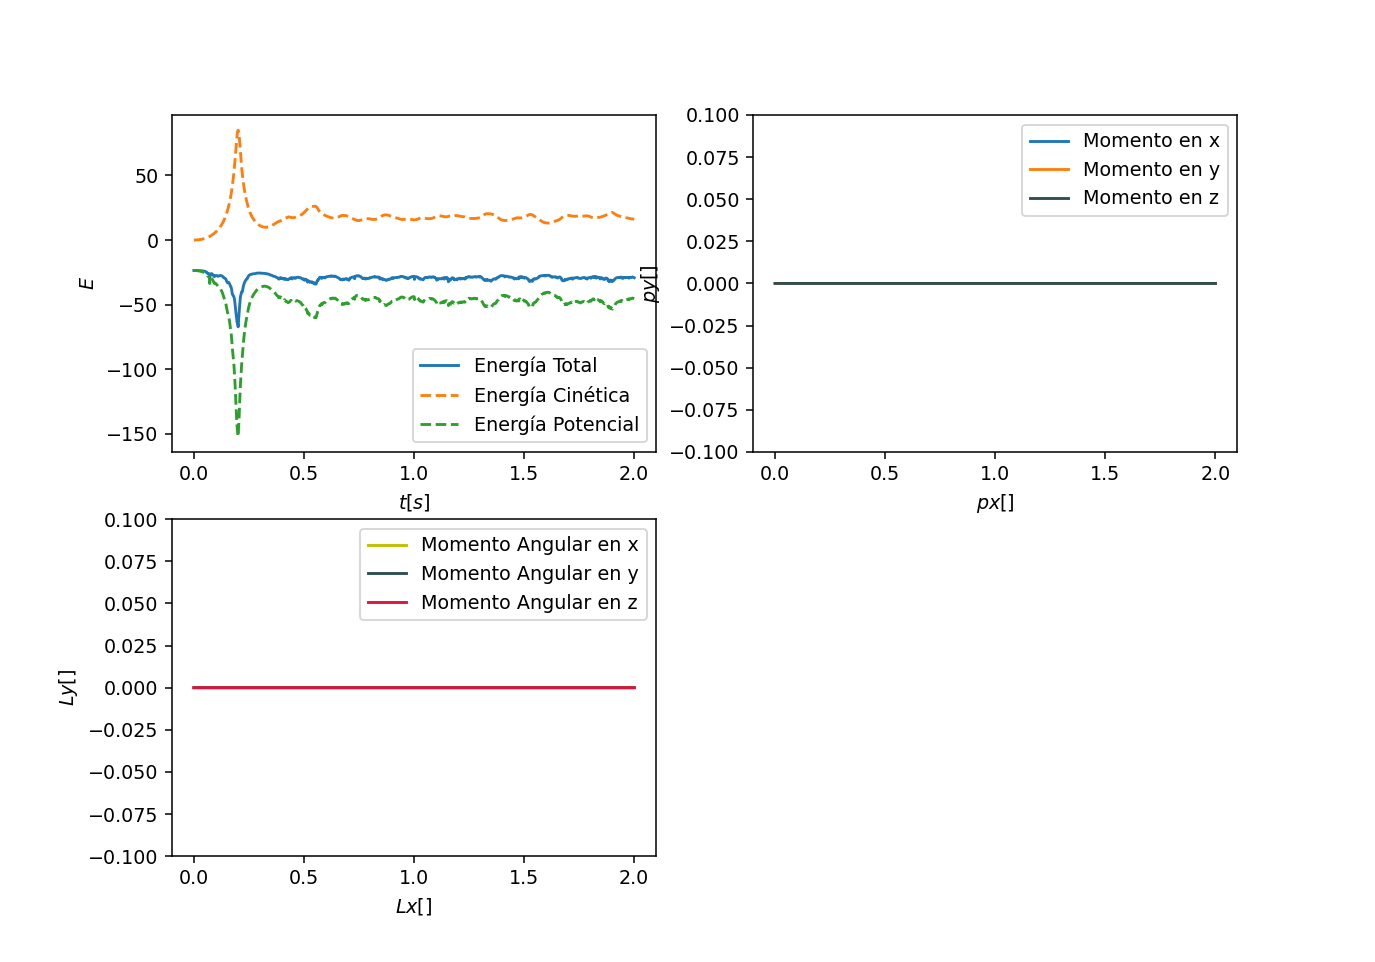

In [90]:
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(2,2,1)
ax2 = fig1.add_subplot(2,2,2)
ax3 = fig1.add_subplot(2,2,3)

ax1.plot(t,EnergiaTotal, label='Energía Total')
ax1.plot(t,EnergiaK,'--',label='Energía Cinética')
ax1.plot(t,EnergiaP,'--',label='Energía Potencial')
ax1.set_xlabel(r'$t[s]$',fontsize=10)
ax1.set_ylabel(r'$E$',fontsize=10)
ax1.legend(loc=0)


ax2.plot(t,Momentum[:,0], label='Momento en x')
ax2.plot(t,Momentum[:,1], label='Momento en y')
ax2.plot(t,Momentum[:,2], color = 'darkslategrey', label='Momento en z')
ax2.set_xlabel(r'$px[]$',fontsize=10)
ax2.set_ylabel(r'$py[]$',fontsize=10)
ax2.legend(loc=0)
ax2.set_ylim(-0.1,0.1)

ax3.plot(t,AngularMomentum[:,0], color = 'y', label='Momento Angular en x')
ax3.plot(t,AngularMomentum[:,1], color = 'darkslategrey', label='Momento Angular en y')
ax3.plot(t,AngularMomentum[:,2], color = 'crimson', label='Momento Angular en z')
ax3.set_xlabel(r'$Lx[]$',fontsize=10)
ax3.set_ylabel(r'$Ly[]$',fontsize=10)
ax3.legend(loc=0)
ax3.set_ylim(-0.1,0.1)

plt.show()

In [91]:
def ReduceTime(t,factor):
    
    for p in Particles:
        p.ReduceSize(factor)
    
    Newt = []
    for i in range(len(t)):
        if i%factor == 0:
            Newt.append(t[i])
            
    return np.array(Newt)


In [92]:
redt = ReduceTime(t,100)

<IPython.core.display.Javascript object>


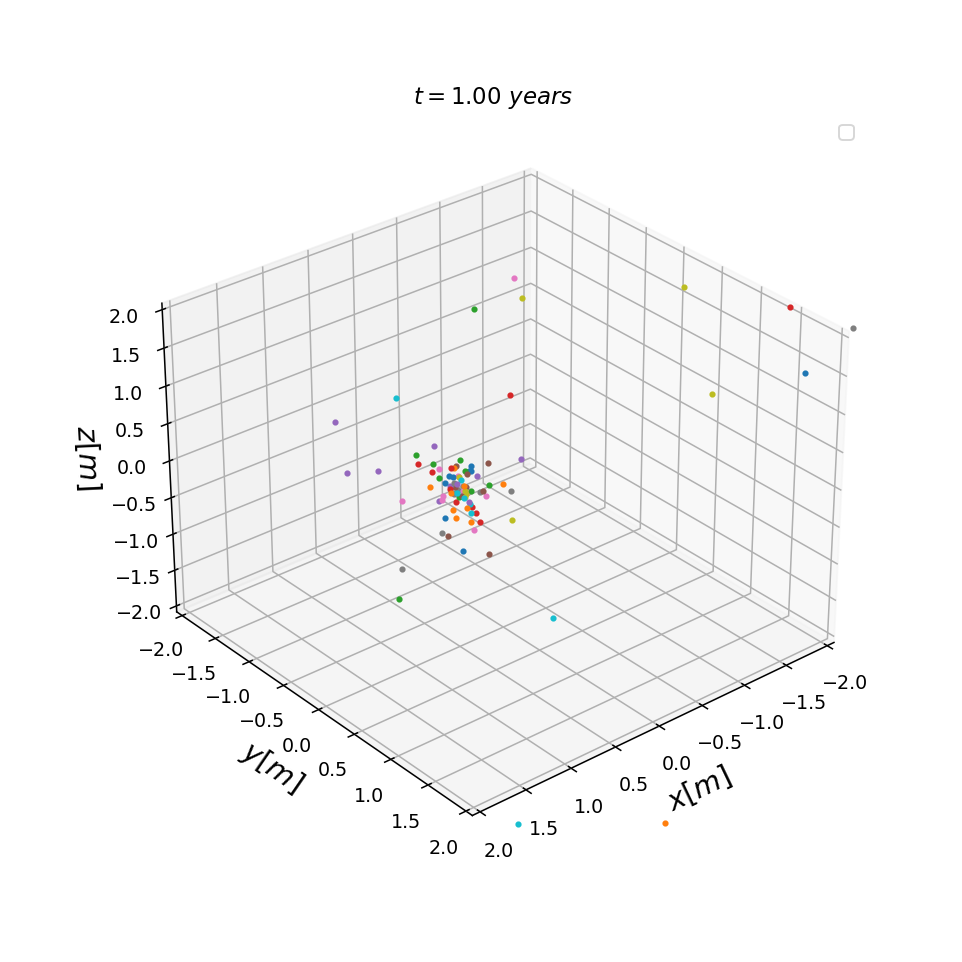

In [93]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,1,1, projection = '3d',elev = 30, azim = 50)
    
def init():
    ax.set_xlabel(r'$x[m]$',fontsize=15)
    ax.set_ylabel(r'$y[m]$',fontsize=15)
    ax.set_zlabel(r'$z[m]$',fontsize=15)
    ax.set_xlim(-Limits[0]-1,Limits[0]+1)
    ax.set_ylim(-Limits[1]-1,Limits[1]+1)
    ax.set_zlim(-Limits[2]-1,Limits[2]+1)


def Update(i):
    
    plot = ax.clear()
    init()
    
    
    
    for p in Particles:
        
        x = p.GetReducePosition()[i,0]
        y = p.GetReducePosition()[i,1]
        z = p.GetReducePosition()[i,2]
        
        
        plot = ax.set_title(r'$t=%.2f \ years$' %(redt[i]))
        
        plot = ax.scatter(x,y,z,marker='.')
        
   
    plot = ax.legend()
            
    return plot
    
Animation = anim.FuncAnimation(fig,Update,frames=len(redt),init_func=init)

### 0.4  4-order simplectic integrator (Yoshida)

In [94]:
TMin, TMax, N = 0.,10., 201
t = np.linspace(TMin, TMax, N)
h = (TMax-TMin)/float(N-1)

r0 = np.array([1.0,0])

def GetA(x):
    return -x

def GetLeapFrog(r0,t):
    
    N = len(t)
    h = t[1] - t[0]
    
    t1 = np.arange(TMin - 0.5*h, TMax - 0.5*h + h, h)
    
    x = np.zeros(N)
    v = np.zeros(N)

    x[0] = r0[0]
    v[0] = r0[1] - 0.5*h*GetA(x[0])
    
    for i in range(1,N):
        
        v[i] = v[i-1] + h*GetA(x[i-1])
        x[i] = x[i-1] + h*v[i]
    

    X = np.array([])
    for i in range(len(x)-1):
        X = np.append(X,(x[i]+x[i+1])*0.5)

    V = v[1:]
    
    
    return X,V

x, v = GetLeapFrog(r0,t)

In [95]:
Ep = []
for i in x:
    Ep.append((1/2)*i**2)
    
Ec = []
for i in v:
    Ec.append((1/2)*i**2)
    
Et = []
for i in range(len(Ep)):
    Et.append(Ep[i]+Ec[i])
    

In [96]:
# Integrador orden 4


def f1(v):
    return v

def f2(x):
    return -x

N = 100


def GetRungeKutta4(t1,tf,h):
    
    N = int((tf - t1)/ h) + 1
    
    t = np.linspace(t1,tf,N)
    
    x = np.zeros(N)
    v = np.zeros(N)
    
    x[0] = 1
    v[0] = 0
    
    
    K1 = np.zeros(2)
    K2 = np.zeros(2)
    K3 = np.zeros(2)
    K4 = np.zeros(2)

    
    
    for i in tqdm(range(1, N)):

        K1[0] = h*f1(v[i-1])
        K1[1] = h*f2(x[i-1])
        
        K2[0] = h*f1(v[i-1] + 0.5*K1[1])
        K2[1] = h*f2(x[i-1] + 0.5*K1[0])
        
        K3[0] = h*f1(v[i-1] + 0.5*K2[1])
        K3[1] = h*f2(x[i-1] + 0.5*K2[0])
        
        K4[0] = h*f1(v[i-1]+K3[1])
        K4[1] = h*f2(x[i-1]+K3[0])

        
        x[i] = x[i-1]+(K1[0]+2*K2[0]+2*K3[0]+K4[0])/6
        v[i] = v[i-1]+(K1[1]+2*K2[1]+2*K3[1]+K4[1])/6

    return t, x, v
    
t_, x_, v_ = GetRungeKutta4(0, 10, 0.01)


100%|██████████| 1000/1000 [00:00<00:00, 143252.98it/s]


In [97]:
Ep2 = []
for i in x_:
    Ep2.append((1/2)*i**2)
    
Ec2 = []
for i in v_:
    Ec2.append((1/2)*i**2)
    
Et2 = []
for i in range(len(Ep2)):
    Et2.append(Ep2[i]+Ec2[i])

<IPython.core.display.Javascript object>


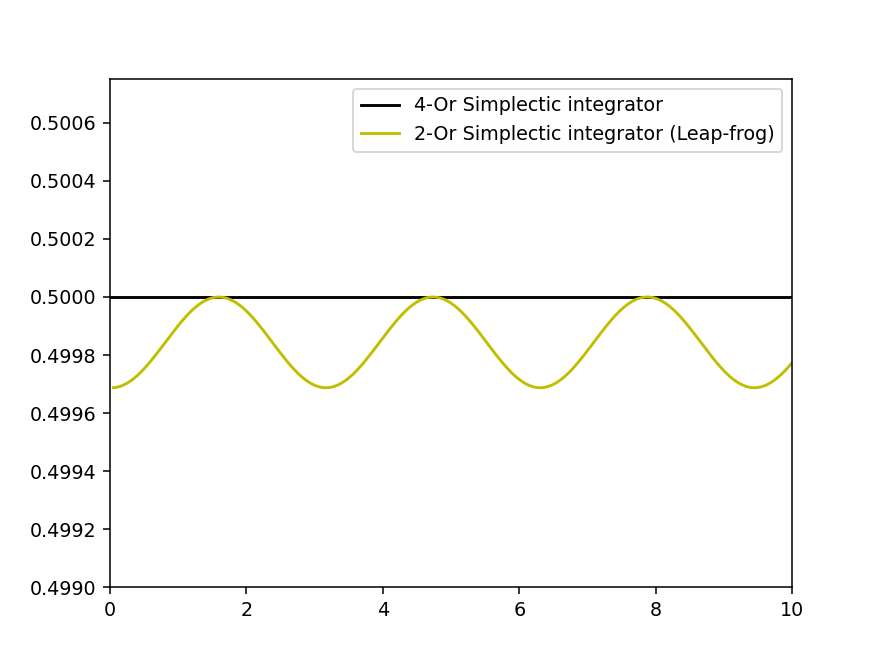

In [99]:
plt.plot(t_,(Et2), 'k',label='4-Or Simplectic integrator')
plt.plot(t[1:],(Et), 'y',label='2-Or Simplectic integrator (Leap-frog)')
plt.legend(loc=0)
plt.xlim(0,10)
plt.ylim(0.4990,0.50075)
plt.show()